In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import muon as mu

sc.logging.print_header()

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.21.5 scipy==1.7.1 pandas==1.2.4 scikit-learn==1.0.1 statsmodels==0.12.2 python-igraph==0.9.8 pynndescent==0.5.5


In [2]:
adata = sc.read_h5ad('raw/GSE161918_RNA_prepped.h5ad')
cite1 = sc.read_h5ad('raw/GSE161918_CITE_prepped_clr_bgsubtracted.h5ad')
cite2 = sc.read_h5ad('raw/GSE161918_CITE_prepped_clr_raw.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 411902 × 1961
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_

In [6]:
cite1 = cite1.raw.to_adata()
cite1.var_names = ['AB_' + v for v in cite1.var_names]
cite1.raw = cite1
cite1

AnnData object with n_obs × n_vars = 411902 × 180
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_s

In [7]:
cite2 = cite2.raw.to_adata()
cite2.var_names = ['AB_' + v for v in cite2.var_names]
cite2.raw = cite2
cite2

AnnData object with n_obs × n_vars = 411902 × 180
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_s

In [8]:
mdata1 = mu.MuData({'rna': adata, 'cite': cite1})
mdata2 = mu.MuData({'rna': adata, 'cite': cite2})

In [9]:
mu.pp.neighbors(mdata1, key_added='wnn')

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/pynndescent/pynndescent_.py:334: NumbaWarning: Cannot cache compiled function "generate_leaf_updates" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/pynndescent/pynndescent_.py:334: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/pynndescent/pynndescent_.py:336: NumbaWarning: Cannot cache compiled function "init_random" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_random(n_neighbors, data, current_graph, dist, rng_state)
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/pynnd

In [10]:
mu.pp.neighbors(mdata2, key_added='wnn')

/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/pynndescent/pynndescent_.py:334: NumbaWarning: Cannot cache compiled function "generate_leaf_updates" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/pynndescent/pynndescent_.py:334: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/pynndescent/pynndescent_.py:336: NumbaWarning: Cannot cache compiled function "init_random" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_random(n_neighbors, data, current_graph, dist, rng_state)
/nfs/team297/kt16/Softwares/conda/envs/scvi-env/lib/python3.8/site-packages/pynnd

In [11]:
mu.tl.umap(mdata1, neighbors_key='wnn', min_dist = 0.3)

In [12]:
mu.tl.umap(mdata2, neighbors_key='wnn', min_dist = 0.3)

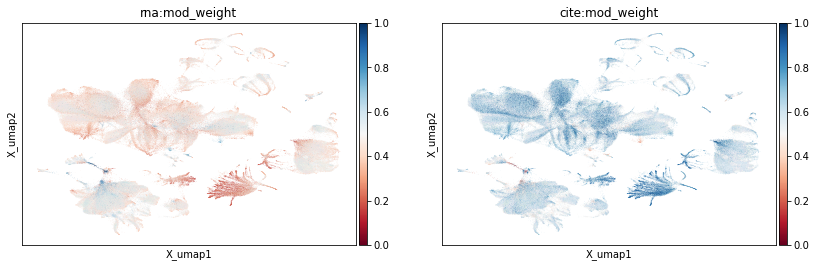

In [13]:
mu.pl.umap(mdata1, color=['rna:mod_weight', 'cite:mod_weight'], cmap='RdBu')

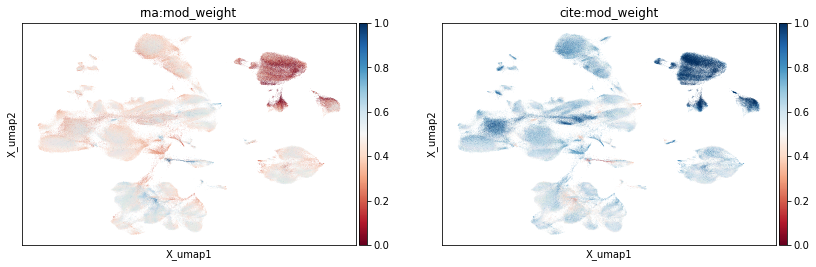

In [14]:
mu.pl.umap(mdata2, color=['rna:mod_weight', 'cite:mod_weight'], cmap='RdBu')

In [15]:
mdata1.write("raw/GSE161918_RNA_cite_bg_corrected_wnn.h5mu", compression = 'gzip')

In [16]:
mdata2.write("raw/GSE161918_RNA_cite_wnn.h5mu", compression = 'gzip')

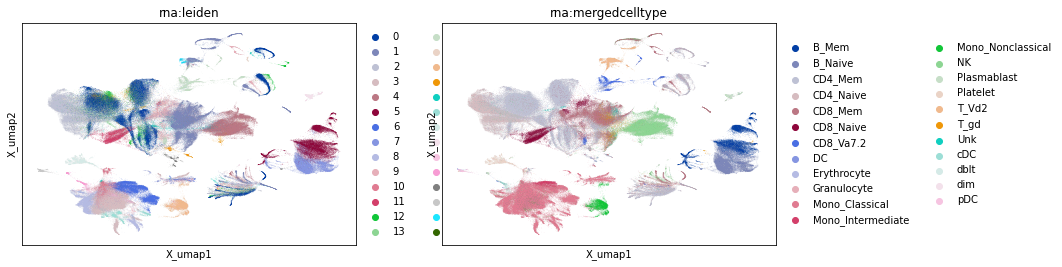

In [17]:
mu.pl.umap(mdata1, color=['rna:leiden', 'rna:mergedcelltype'])

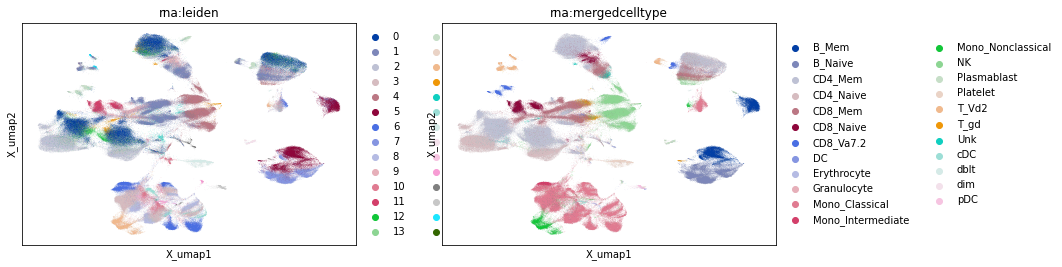

In [18]:
mu.pl.umap(mdata2, color=['rna:leiden', 'rna:mergedcelltype'])

In [19]:
mdata1.obs['cite_normal:leiden'] = mdata2.obs['cite:leiden']
mdata2.obs['cite_bgcorrected:leiden'] = mdata1.obs['cite:leiden']
mdata1.obs['cite_bgcorrected:leiden'] = mdata1.obs['cite:leiden']
mdata2.obs['cite_normal:leiden'] = mdata2.obs['cite:leiden']

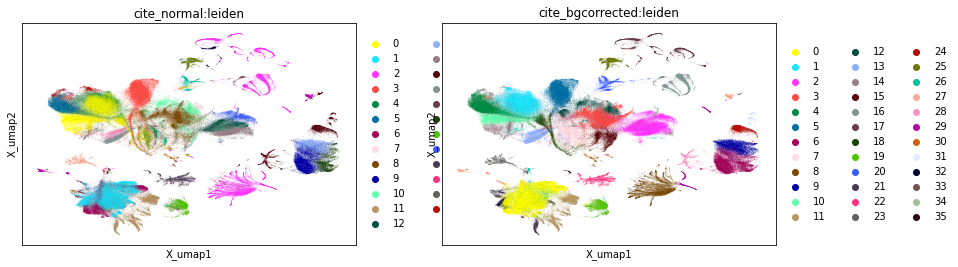

In [20]:
mu.pl.umap(mdata1, color=['cite_normal:leiden', 'cite_bgcorrected:leiden'])

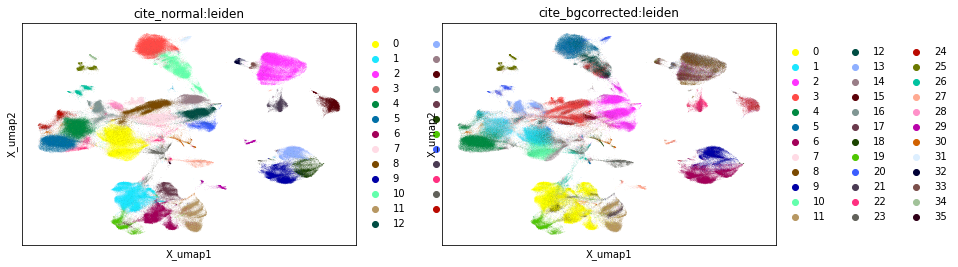

In [21]:
mu.pl.umap(mdata2, color=['cite_normal:leiden', 'cite_bgcorrected:leiden'])